<a href="https://colab.research.google.com/github/sena1bayram/LotusAI_Birliktelik_Analizi/blob/main/Birliktelik_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install pandas mlxtend matplotlib seaborn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Anaizler

In [11]:
import mlxtend
print(mlxtend.__version__)


0.23.3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1]:
!pip uninstall mlxtend
!pip install mlxtend==0.21.0


Found existing installation: mlxtend 0.21.0
Uninstalling mlxtend-0.21.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/mlxtend-0.21.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/mlxtend/*
Proceed (Y/n)? ERROR: Operation cancelled by user
^C


# **En yüksek performansa sahip ürün kombinasyonlarını sıralama ve kural ağı (association rule network) oluşturma**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



En Yüksek Performansa Sahip Ürün Kombinasyonları:
                                   antecedents  \
15181  (other vegetables, sausage, whole milk)   
15188                     (yogurt, rolls/buns)   
15179   (other vegetables, yogurt, rolls/buns)   
15190                    (sausage, whole milk)   
12801                           (yogurt, curd)   
12796                    (sausage, whole milk)   
15176        (sausage, whole milk, rolls/buns)   
15193               (other vegetables, yogurt)   
15182   (other vegetables, whole milk, yogurt)   
15187                    (sausage, rolls/buns)   

                                   consequents   support  confidence      lift  
15181                     (yogurt, rolls/buns)  0.013597    0.270408  2.428689  
15188  (other vegetables, sausage, whole milk)  0.013597    0.122120  2.428689  
15179                    (sausage, whole milk)  0.013597    0.259804  2.428575  
15190   (other vegetables, yogurt, rolls/buns)  0.013597    0.127098  2.42

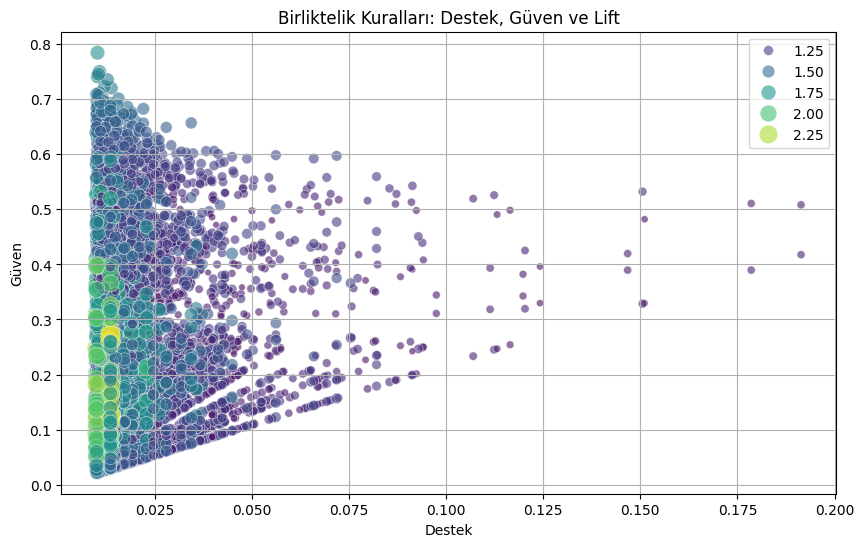

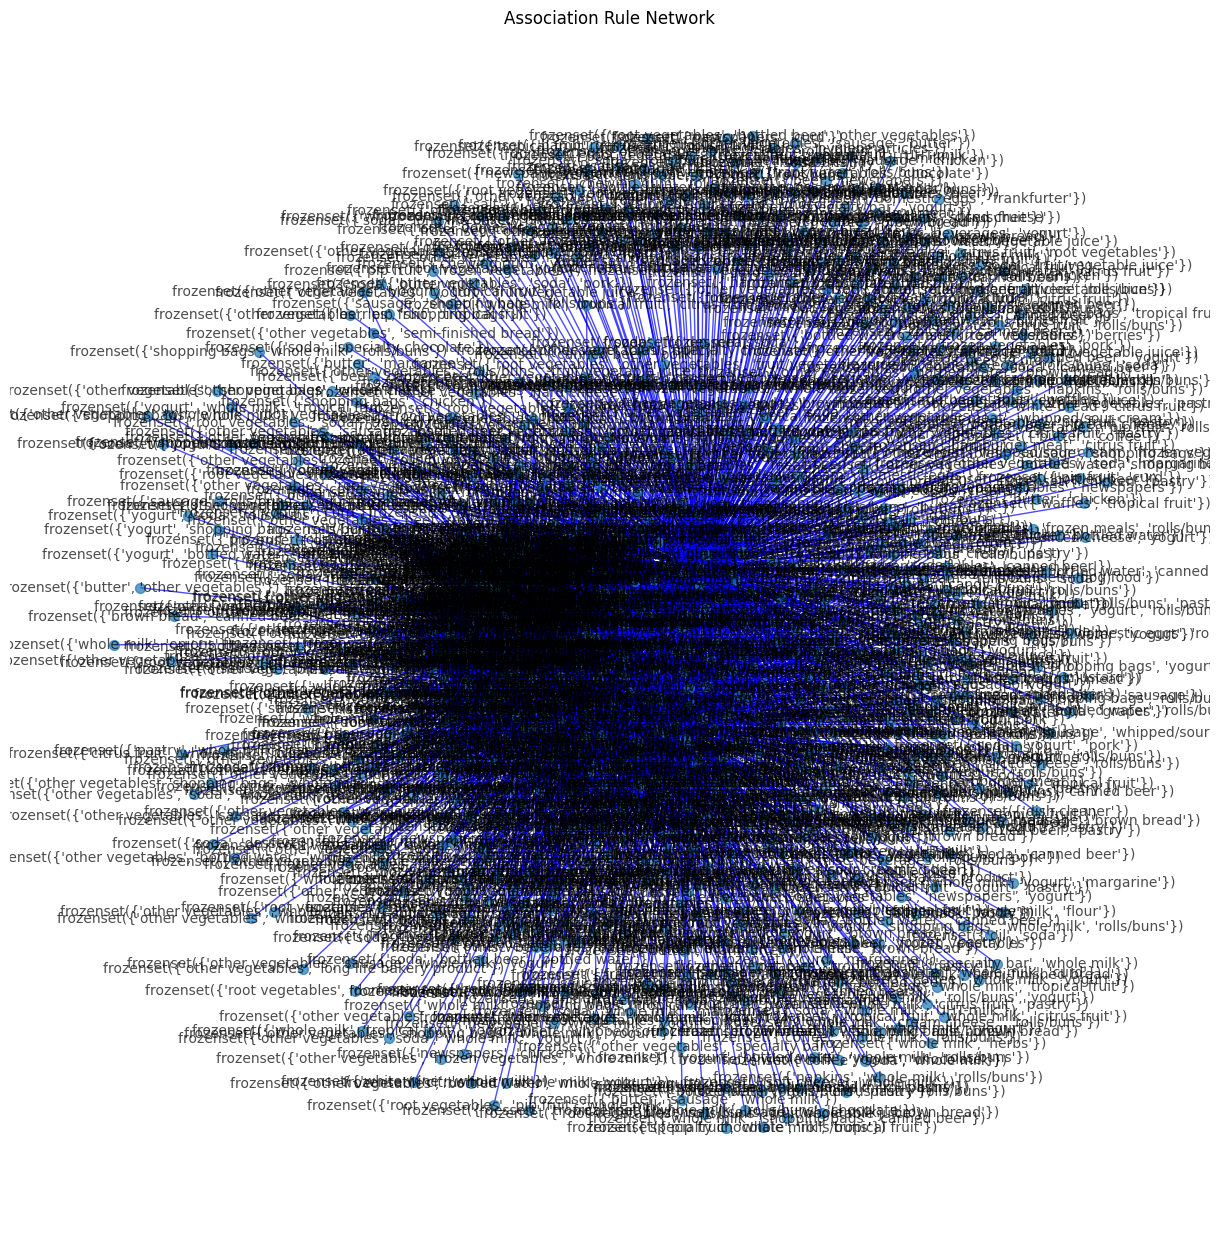

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Veri setini yükle
data = pd.read_csv('Groceries_dataset.csv', dayfirst=True)

# 'Date' sütununu kullanarak yalnızca alışveriş günlerini alalım
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Date'] = data['Date'].dt.date

# 'itemDescription' sütunundaki her bir alışverişi bir diziye dönüştür
basket = data.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().reset_index().fillna(0).set_index('Member_number')

# 1 veya 0 değerlerine dönüştür
basket_encoded = (basket > 0).astype(bool)

# Apriori algoritması ile sık item setlerini bul
frequent_itemsets = apriori(basket_encoded, min_support=0.01, use_colnames=True)

# Eğer itemsets sütunu uygun formatta değilse dönüştür
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(frozenset)

# Birliktelik kurallarını oluştur
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# En Yüksek Performansa Sahip Ürün Kombinasyonlarını Sıralama
best_rules = rules.sort_values(by=['lift', 'confidence'], ascending=False)

# En iyi kuralları yazdırma
print("\nEn Yüksek Performansa Sahip Ürün Kombinasyonları:")
print(best_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

# Sonuçları görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', sizes=(20, 200), hue='lift', alpha=0.6, palette='viridis')
plt.title('Birliktelik Kuralları: Destek, Güven ve Lift')
plt.xlabel('Destek')
plt.ylabel('Güven')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Kural ağı oluşturma
G = nx.Graph()

# Her kural için bir kenar oluşturun
for _, rule in rules.iterrows():
    G.add_edge(str(rule['antecedents']), str(rule['consequents']), weight=rule['lift'])

# Ağı görselleştirme
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, font_size=10, node_size=50, edge_color='blue', alpha=0.7)
plt.title("Association Rule Network")
plt.show()



# **Hiperparametre Optimizasyonu**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Evaluating min_support=0.01 and min_threshold=0.5...
Evaluating min_support=0.01 and min_threshold=0.6...
Evaluating min_support=0.01 and min_threshold=0.7...
Evaluating min_support=0.02 and min_threshold=0.5...
Evaluating min_support=0.02 and min_threshold=0.6...
Evaluating min_support=0.02 and min_threshold=0.7...
Evaluating min_support=0.05 and min_threshold=0.5...
Evaluating min_support=0.05 and min_threshold=0.6...
Evaluating min_support=0.05 and min_threshold=0.7...
Evaluating min_support=0.1 and min_threshold=0.5...
Evaluating min_support=0.1 and min_threshold=0.6...
Evaluating min_support=0.1 and min_threshold=0.7...

En İyi Parametre Kombinasyonu:
{'min_support': 0.01, 'min_threshold': 0.5, 'num_rules': 15480, 'best_lift': 2.4286889871155837}

En İyi Kurallar:
       antecedents     consequents   support  confidence      lift
0           (beef)      (UHT-milk)  0.010518    0.087983  1.120775
1       (UHT-milk)          (beef)  0.010518    0.133987  1.120775
2   (bottled beer) 

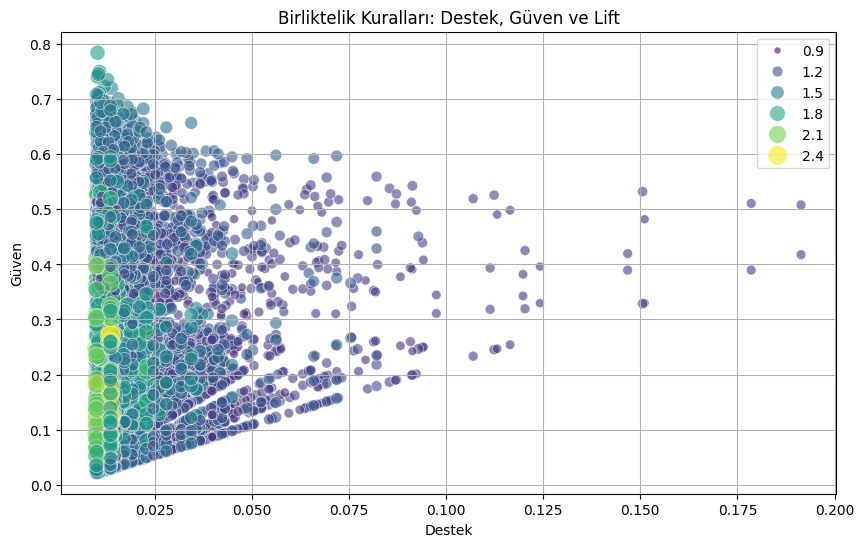

In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Veri setini yükle
data = pd.read_csv('Groceries_dataset.csv', dayfirst=True)

# 'Date' sütununu kullanarak yalnızca alışveriş günlerini alalım
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Date'] = data['Date'].dt.date

# 'itemDescription' sütunundaki her bir alışverişi bir diziye dönüştür
basket = data.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().reset_index().fillna(0).set_index('Member_number')

# 1 veya 0 değerlerine dönüştür
basket_encoded = (basket > 0).astype(bool)

# Hiperparametre optimizasyonu için grid search işlemi
param_grid = {
    'min_support': [0.01, 0.02, 0.05, 0.1],  # Farklı min_support değerleri
    'min_threshold': [0.5, 0.6, 0.7],        # Farklı min_threshold (confidence) değerleri
}

# Sonuçları saklamak için bir liste
best_rules = []

# Grid Search için her parametre kombinasyonu üzerinde deney yapma
for min_support in param_grid['min_support']:
    for min_threshold in param_grid['min_threshold']:
        print(f"Evaluating min_support={min_support} and min_threshold={min_threshold}...")

        # Apriori algoritmasını çalıştırma
        frequent_itemsets = apriori(basket_encoded, min_support=min_support, use_colnames=True)

        # Birliktelik kurallarını çıkarma
        rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_threshold)

        # Sonuçları kaydetme
        best_rules.append({
            'min_support': min_support,
            'min_threshold': min_threshold,
            'num_rules': len(rules),
            'best_lift': rules['lift'].max() if len(rules) > 0 else None
        })

# En iyi parametre kombinasyonunu bulma
best_combination = max(best_rules, key=lambda x: x['best_lift'])

print("\nEn İyi Parametre Kombinasyonu:")
print(best_combination)

# Bu parametrelerle sonuçları görselleştirme
best_support = best_combination['min_support']
best_threshold = best_combination['min_threshold']

# En iyi parametrelerle final analizi
frequent_itemsets = apriori(basket_encoded, min_support=best_support, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=best_threshold)

# Sonuçları yazdırma
print("\nEn İyi Kurallar:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

# Sonuçları görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', sizes=(20, 200), hue='lift', alpha=0.6, palette='viridis')
plt.title('Birliktelik Kuralları: Destek, Güven ve Lift')
plt.xlabel('Destek')
plt.ylabel('Güven')
plt.legend(loc='upper right')
plt.grid()
plt.show()


# **Ürün Kombinasyonlarını görebilme:**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



En Yüksek Performansa Sahip Ürün Kombinasyonları (En İyi 10 Kural):
Öncüller: other vegetables, sausage, whole milk -> Sonuç: yogurt, rolls/buns | Destek: 0.0136, Güven: 0.2704, Lift: 2.4287
Öncüller: yogurt, rolls/buns -> Sonuç: other vegetables, sausage, whole milk | Destek: 0.0136, Güven: 0.1221, Lift: 2.4287
Öncüller: other vegetables, yogurt, rolls/buns -> Sonuç: sausage, whole milk | Destek: 0.0136, Güven: 0.2598, Lift: 2.4286
Öncüller: sausage, whole milk -> Sonuç: other vegetables, yogurt, rolls/buns | Destek: 0.0136, Güven: 0.1271, Lift: 2.4286
Öncüller: yogurt, curd -> Sonuç: sausage, whole milk | Destek: 0.0100, Güven: 0.2484, Lift: 2.3220
Öncüller: sausage, whole milk -> Sonuç: yogurt, curd | Destek: 0.0100, Güven: 0.0935, Lift: 2.3220
Öncüller: sausage, whole milk, rolls/buns -> Sonuç: other vegetables, yogurt | Destek: 0.0136, Güven: 0.2789, Lift: 2.3184
Öncüller: other vegetables, yogurt -> Sonuç: sausage, whole milk, rolls/buns | Destek: 0.0136, Güven: 0.1130, Lift: 2.

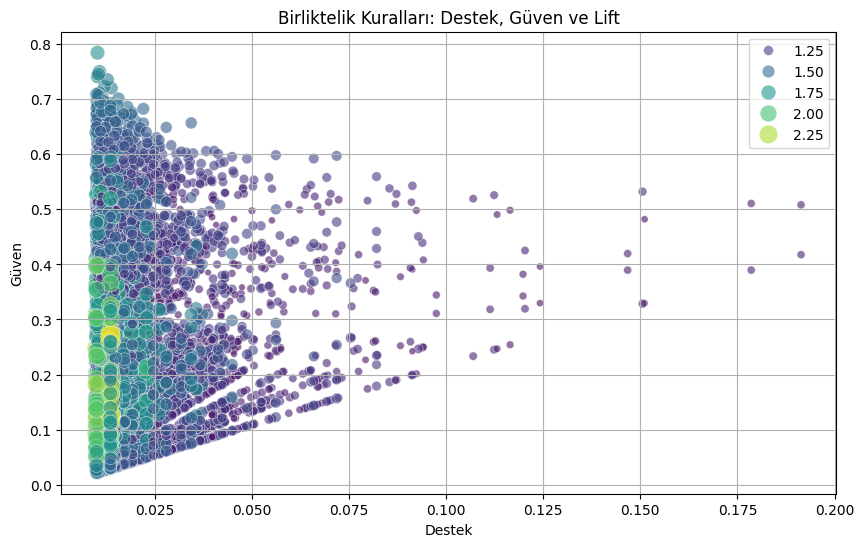

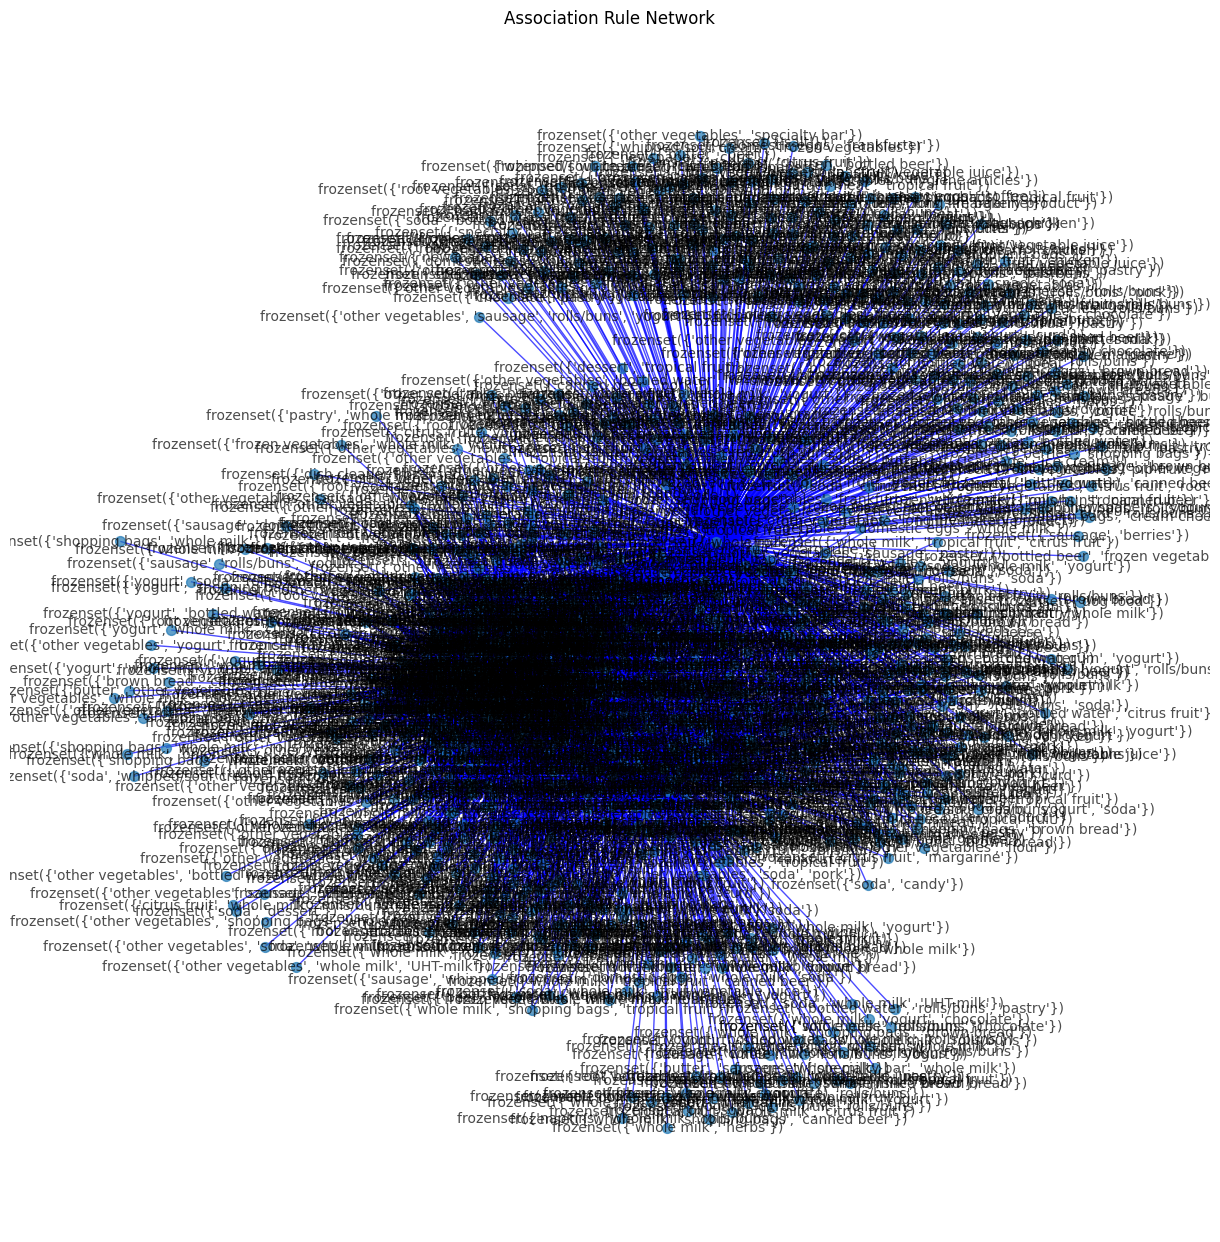

In [6]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Veri setini yükle
data = pd.read_csv('Groceries_dataset.csv', dayfirst=True)

# 'Date' sütununu kullanarak yalnızca alışveriş günlerini alalım
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Date'] = data['Date'].dt.date

# 'itemDescription' sütunundaki her bir alışverişi bir diziye dönüştür
basket = data.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().reset_index().fillna(0).set_index('Member_number')

# 1 veya 0 değerlerine dönüştür
basket_encoded = (basket > 0).astype(bool)

# Apriori algoritması ile sık item setlerini bul
frequent_itemsets = apriori(basket_encoded, min_support=0.01, use_colnames=True)

# Eğer itemsets sütunu uygun formatta değilse dönüştür
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(frozenset)

# Birliktelik kurallarını oluştur
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# En Yüksek Performansa Sahip Ürün Kombinasyonlarını Sıralama
best_rules = rules.sort_values(by=['lift', 'confidence'], ascending=False)

# En iyi 10 kuralı yazdırma
print("\nEn Yüksek Performansa Sahip Ürün Kombinasyonları (En İyi 10 Kural):")
for idx, rule in best_rules.head(10).iterrows():
    antecedents = ', '.join(list(rule['antecedents']))
    consequents = ', '.join(list(rule['consequents']))
    print(f"Öncüller: {antecedents} -> Sonuç: {consequents} | Destek: {rule['support']:.4f}, Güven: {rule['confidence']:.4f}, Lift: {rule['lift']:.4f}")

# Sonuçları görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', sizes=(20, 200), hue='lift', alpha=0.6, palette='viridis')
plt.title('Birliktelik Kuralları: Destek, Güven ve Lift')
plt.xlabel('Destek')
plt.ylabel('Güven')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Kural ağı oluşturma
G = nx.Graph()

# Her kural için bir kenar oluşturun
for _, rule in rules.iterrows():
    G.add_edge(str(rule['antecedents']), str(rule['consequents']), weight=rule['lift'])

# Ağı görselleştirme
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, font_size=10, node_size=50, edge_color='blue', alpha=0.7)
plt.title("Association Rule Network")
plt.show()